Causal inference problem on exam 2023 

Variables: A,B,C,X,Y \\
Coefficients: c1-c7 (assumed unknown)

Diagram:

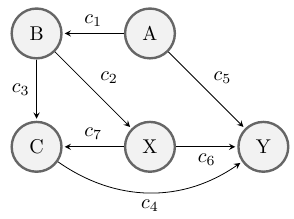

In [1]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
from  statistics import *

In [33]:
# How the data could have been generated (linear structured causal model)
# The true coefficients c1-c7 are unknown 

c1 = 1
c2 = 1
c3 = 1
c4 = 1
c5 = 1
c6 = 1
c7 = 1

N = 10000; 
na = np.random.normal(0, 1, N)
nb = np.random.normal(0, 1, N)
nc = np.random.normal(0, 1, N)
nx = np.random.normal(0, 1, N)
ny = np.random.normal(0, 1, N)

A = na
B = c1*A + nb
X = c2*B + nx     # An intervention on X would replace this line
X = 7.5 * np.ones(N)  # use for example this line to set X = 5.0
C = c3*B + c7*X + nc
Y = c4*C + c5*A + c6*X + ny

dat1 = pd.DataFrame({'A':A, 'B':B, 'C':C, 'X':X, 'Y':Y})
mean(Y)

14.991877644561601

10.00441067090529

In [27]:
# Ordinary Least Squares Estimation, with no bias term
results1 = smf.ols('Y ~  X - 1 ', data=dat1).fit()  
print(results1.summary())


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                          5.718e+04
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                        0.00
Time:                        11:36:15   Log-Likelihood:                         -18620.
No. Observations:               10000   AIC:                                  3.724e+04
Df Residuals:                    9998   BIC:                                  3.726e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

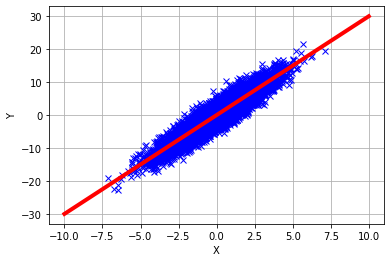

In [ ]:
plt.plot(X,Y,'bx')
plt.plot([-10,10],[-3*10,3*10],'r',linewidth=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

In [32]:
# Would like to choose X to achieve mean value Y = 15; 
# You can not use c1-c7 in your calculation, since these will be unknown in practice
# To find suitable X you are instead only allowed to use existing data before the change for either: 
# X, Y and A
# X, Y and B
# X, Y and C
results2 = smf.ols('Y ~ X + B - 1 ', data=dat1).fit()  
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          5.646e+04
Date:                Wed, 11 Jan 2023   Prob (F-statistic):                        0.00
Time:                        11:43:45   Log-Likelihood:                         -18678.
No. Observations:               10000   AIC:                                  3.736e+04
Df Residuals:                    9998   BIC:                                  3.738e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
mean(Y) 

15.008979933858118

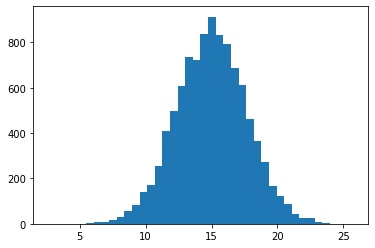

In [34]:
plt.hist(Y,bins=40);

In [ ]:


# To verify your idea, find suitable X from your causal inference analysis on historical data. 
# Do an intervention with this X and check that mean(Y) = 15 (approximately)
# You can experiment with increasing N if you want to reduce impact of noise.
# You might also want to change c1, .., c7 and verify that you method works for the general case
